# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 5

### Wstęp

Przedsiębiorstwo zajmujące się produkcją wyrobów mlecznych otrzymało kilka zamówień od klientów. Dane dotyczące cen składników, ich wykorzystania w produktach oraz zamówień zostały przedstawione poniżej.

### Dane

**Ceny składników:**

| Składnik     | Cena (PLN) |
| :---         | ---: |
| Mleko (l)    | 3.5 |
| Cukier (kg)  | 5   |
| Kakao (100g) | 8   |
| Sól (kg)     | 2   |


**Zestawienie składników wykorzystywanych w produktach:**

| Prod.\Skł.| Mleko (l) | Cukier (kg)  | Kakao (100g) | Sól (kg)    |
| :---      |      ---: |         ---: |         ---: |        ---: |
| Masło     | 5         | 0            | 0            | 0           |
| Czekolada | 1         | 0.1          | 5            | 0.01        |
| Ser żółty | 10        | 0            | 0            | 0.05        |
| Twaróg    | 2         | 0            | 0            | 0.1         |


**Zamówienia złożone przez klientów:**

| Klient\Prod.| Masło | Czekolada | Ser żółty | Twaróg |
| :---        |  ---: |      ---: |      ---: |   ---: |
| Klient 1    | 10    | 50        | 5         | 5      |
| Klient 2    | 120   | 90        | 15        | 25     |
| Klient 3    | 0     | 10        | 1         | 1      |


> **Uwaga**: W celu wizualizacji wyników można wykorzystać funkcję `plt.table`.

> Informacja: Przedstawione dane mają charakter poglądowy i nie odwzorowują rzeczywistych uwarunkowań rynkowych.

### Zadanie 1

Z wykorzystaniem operacji macierzowych należy obliczyć odpowiednie wartości i udzielić odpowiedzi na poniższe pytania:

#### A) Jaki jest koszt wyprodukowania każdego z produktów?






 

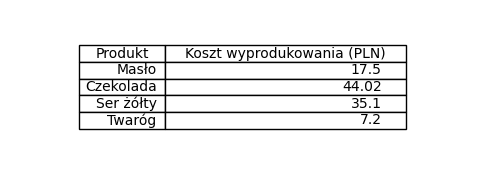

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

products = ['Masło', 'Czekolada', 'Ser żółty', 'Twaróg']

prices = np.array([3.5, 5, 8, 2]) 

ingredients = np.array([
    [5, 0, 0, 0],     
    [1, 0.1, 5, 0.01], 
    [10, 0, 0, 0.05], 
    [2, 0, 0, 0.1]  
])

production_costs = np.dot(ingredients, prices)

production_costs_df = pd.DataFrame({
    'Produkt': products,
    'Koszt wyprodukowania (PLN)': production_costs
})

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=production_costs_df.values, colLabels=production_costs_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(production_costs_df.columns))))
plt.show()



#### B) Ile składników zostanie uzytych na realizację zamówień klientów (każdego osobno i łącznie)?



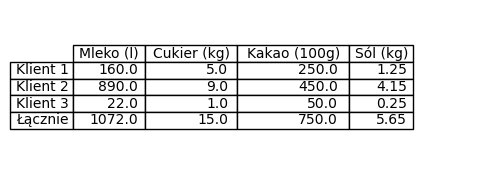

In [50]:
orders = np.array([
    [10, 50, 5, 5],  
    [120, 90, 15, 25], 
    [0, 10, 1, 1]   
])

ingredients_needed = np.dot(orders, ingredients)
ingredients_needed_df = pd.DataFrame(
    ingredients_needed,
    columns=['Mleko (l)', 'Cukier (kg)', 'Kakao (100g)', 'Sól (kg)'],
    index=['Klient 1', 'Klient 2', 'Klient 3']
)

ingredients_needed_df.loc['Łącznie'] = ingredients_needed_df.sum()

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=ingredients_needed_df.values, colLabels=ingredients_needed_df.columns, rowLabels=ingredients_needed_df.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(ingredients_needed_df.columns))))
plt.show()

#### C) Zakładając marżę $30\%$ (pomijając wszystkie inne czynniki), ile klienci będą musieli zapłacić za zrealizowanie zamówienia?



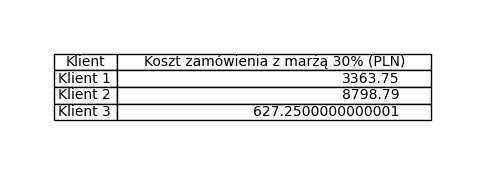

In [79]:
order_costs = np.dot(orders, production_costs)

my_earnings = np.diag([1.3, 1.3, 1.3]) 

order_costs_with_margin = np.dot(order_costs, my_earnings)

order_costs_df = pd.DataFrame({
    'Klient': ['Klient 1', 'Klient 2', 'Klient 3'],
    'Koszt zamówienia z marżą 30% (PLN)': order_costs_with_margin
})

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=order_costs_df.values, colLabels=order_costs_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(order_costs_df.columns))))
plt.show()

#### D) Jaki jest łączny koszt składników jakie należy zamówić, aby zrealizować wszystkie zamówienia klientów?




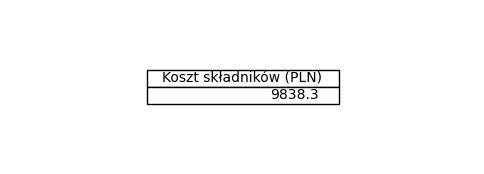

In [85]:
orders_costs = np.dot(orders, production_costs)
my_sum = np.array([1, 1, 1])
costs_sum = np.dot(orders_costs, my_sum)

cost_sum_df = pd.DataFrame({
    'Koszt składników (PLN)': [costs_sum],
})

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=cost_sum_df.values, colLabels=cost_sum_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(cost_sum_df.columns))))
plt.show()


### Zadanie 2

Należy zaimplementować skrypt, który przyjmuje dwie macierze $A$ oraz $B$, a następnie wypisuje szczegółowe operacje wykonywane podczas ich mnożenia.

**Przykład:**

Dane wejściowe:

\begin{equation}
A = \begin{pmatrix}
1 & 2 & 1\\
4 & 4 & 5\\
6 & 7 & 7
\end{pmatrix}, 
 B = \begin{pmatrix}
-7 & -7 & 6\\
2 & 1 & -1\\
4 & 5 & -4
\end{pmatrix}
\end{equation}

Oczekiwany wynik:

```
C[0, 0] = 1 * (-7) + 2 * 2 + 1 * 4 = 1
C[0, 1] = 1 * (-7) + 2 * 1 + 1 * 5 = 0
C[0, 2] = 1 * 6 + 2 * (-1) + 1 * (-4) = 0
C[1, 0] = 4 * (-7) + 4 * 2 + 5 * 4 = 0
C[1, 1] = 4 * (-7) + 4 * 1 + 5 * 5 = 1
C[1, 2] = 4 * 6 + 4 * (-1) + 5 * (-4) = 0
C[2, 0] = 6 * (-7) + 7 * 2 + 7 * 4 = 0
C[2, 1] = 6 * (-7) + 7 * 1 + 7 * 5 = 0
C[2, 2] = 6 * 6 + 7 * (-1) + 7 * (-4) = 1

[[1 0 0]
 [0 1 0]
 [0 0 1]]
```



In [70]:
A = np.array([[1, 2, 1], [4, 4, 5], [6, 7, 7]])
B = np.array([[-7, -7, 6], [2, 1, -1], [4, 5, -4]])

C = np.zeros((len(A), len(B[0])))

for i in range(len(A)):
    for j in range(len(B)):
        new_sum = 0
        print(f'C({i}, {j}) = ', end='')
        for x in range(len(A[i])):
            new_sum += A[i][x] * B[x][j]
            if (A[i][x] > 0): 
                print(f'{A[i][x]} ', end='')
            else :
                print(f'({A[i][x]}) ')
            print(f' * ', end='')
            if (B[x][j] > 0): 
                print(f'{B[x][j]} ', end='') 
            else :
                print(f'({B[x][j]}) ', end='')
            if (x != len(A[i]) - 1):
                print(f' + ', end='')
        print(f' = {new_sum}') 
        C[i][j] = new_sum    

print(f'\n{C}') 

C(0, 0) = 1  * (-7)  + 2  * 2  + 1  * 4  = 1
C(0, 1) = 1  * (-7)  + 2  * 1  + 1  * 5  = 0
C(0, 2) = 1  * 6  + 2  * (-1)  + 1  * (-4)  = 0
C(1, 0) = 4  * (-7)  + 4  * 2  + 5  * 4  = 0
C(1, 1) = 4  * (-7)  + 4  * 1  + 5  * 5  = 1
C(1, 2) = 4  * 6  + 4  * (-1)  + 5  * (-4)  = 0
C(2, 0) = 6  * (-7)  + 7  * 2  + 7  * 4  = 0
C(2, 1) = 6  * (-7)  + 7  * 1  + 7  * 5  = 0
C(2, 2) = 6  * 6  + 7  * (-1)  + 7  * (-4)  = 1

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
